<div style="text-align: center;">
    <h1>PROJECT P8
    <h1><b>Multilabel classificator for patient preference studies</h1>
    <p><b>Gillio Francesco Giuseppe</b></p>
    <p>Seminario Yrigo̱yen César Augusto</b></p>
    <h3>Applied Data Science Project</h3>
    <p><i>Polytechnic University of Turin - Italy</i></p>
</div>

# 1. Data preprocessing



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations #for label sets imbalance

#P8 polito github - project import
!git clone https://github.com/adsp-polito/2024-P8-PPS.git
dataset_CA=pd.read_excel('/content/2024-P8-PPS/data/DB_clinical_areas.xlsx')
dataset_Interventions=pd.read_excel('/content/2024-P8-PPS/data/DB_interventions.xlsx')

Cloning into '2024-P8-PPS'...
remote: Enumerating objects: 231, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 231 (delta 42), reused 61 (delta 11), pack-reused 115 (from 3)
Receiving objects: 100% (231/231), 203.79 MiB | 35.38 MiB/s, done.
Resolving deltas: 100% (72/72), done.


**Functions to calculate lengths of titles & abstracts**

In [10]:
def show_stats_of_titles_abstracts(data):
  data_stats=pd.DataFrame(columns=['Title Length', 'Abstract Length'])
  data_stats['Title Length'] = data['Title'].astype(str).apply(lambda x: len(x.split()))
  data_stats['Abstract Length'] = data['Abstract'].astype(str).apply(lambda x: len(x.split()))

  print(f"Average Title Length: {data_stats['Title Length'].mean():.2f} words")
  print(f"Average Abstract Length: {data_stats['Abstract Length'].mean():.2f} words")

  data_stats['Title Issues'] = data['Title'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 0)
  data_stats['Abstract Issues'] = data['Abstract'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 0)

  print(f"Number of rows with Anomalies in the Title: {data_stats[~data_stats['Title Issues']].shape[0]}")
  print(f"Number of rows with Anomalies in the Abstract: {data_stats[~data_stats['Abstract Issues']].shape[0]}")
  return data_stats



In [11]:
stats_CA=show_stats_of_titles_abstracts(dataset_CA)

Average Title Length: 14.65 words
Average Abstract Length: 242.98 words
Number of rows with Anomalies in the Title: 0
Number of rows with Anomalies in the Abstract: 54


In [13]:
stats_Int=show_stats_of_titles_abstracts(dataset_Interventions)

Average Title Length: 7.09 words
Average Abstract Length: 124.25 words
Number of rows with Anomalies in the Title: 22
Number of rows with Anomalies in the Abstract: 54


# 2. Data Visualization

In [18]:
def show_distributions(data,column,col='#EE1A39'):
  '''
  col='#EE1A39' red
  col='#002A5C' grey
  column='Title Length'
  column='Abstract Length'
  '''

  import seaborn as sns
  import matplotlib.pyplot as plt

  unito = "#EE1A39"
  polito = "#002A5C"
  plt.figure(figsize=(12, 6))
  sns.histplot(data[column],
              kde=True,
              color=col,
              bins=30)
  plt.axvline(data[column].mean(),
              color=col,
              linestyle='dashed',
              linewidth=1.5,
              label='Mean'+ column)
  plt.title('Distribution of ' + column)
  plt.xlabel('Length (Word Count)')
  plt.ylabel('Frequency')
  plt.legend()
  plt.show()
  return

Clinical areas title & abstract distribution


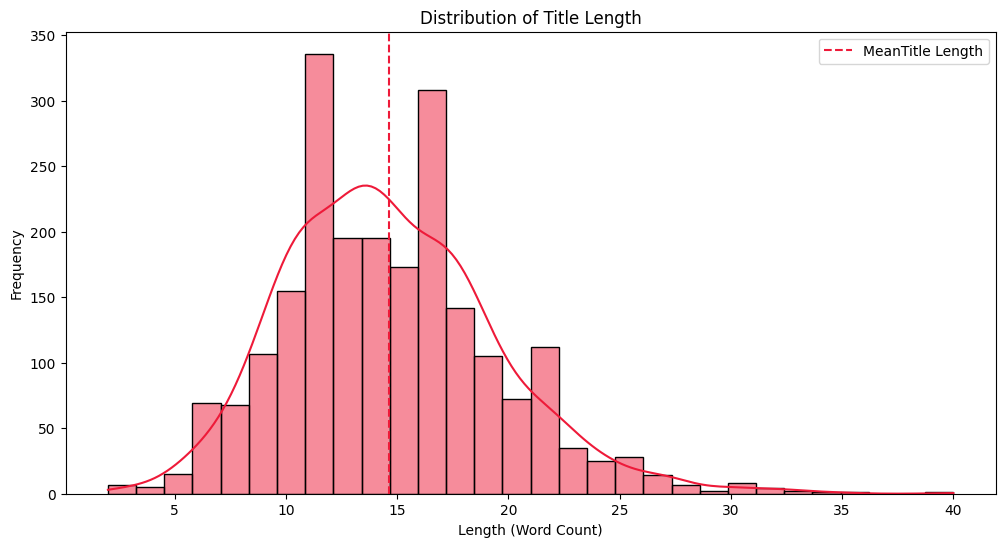

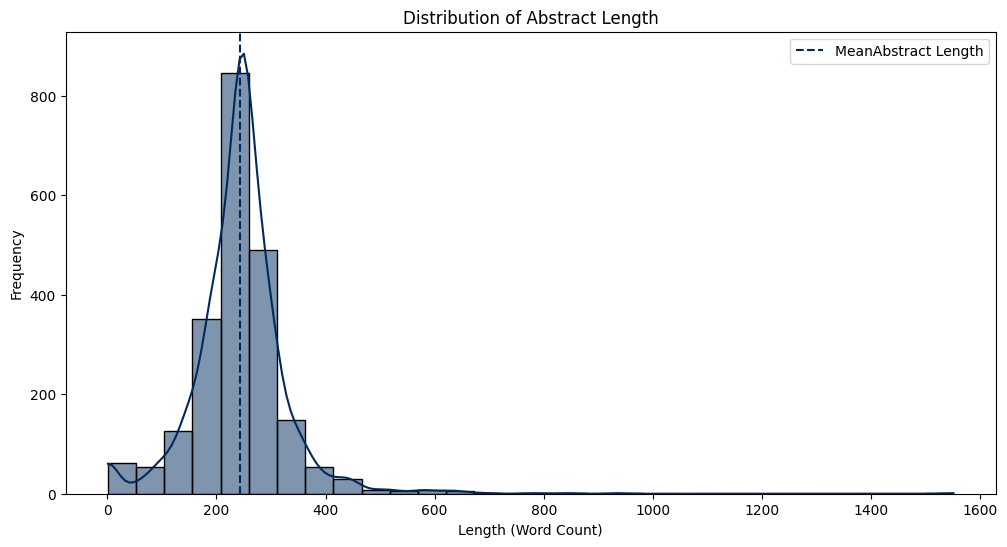

In [21]:
print(f"Clinical areas title & abstract distribution")
show_distributions(stats_CA,'Title Length',col='#EE1A39')
show_distributions(stats_CA,'Abstract Length',col='#002A5C')

Interventions title & abstract distribution


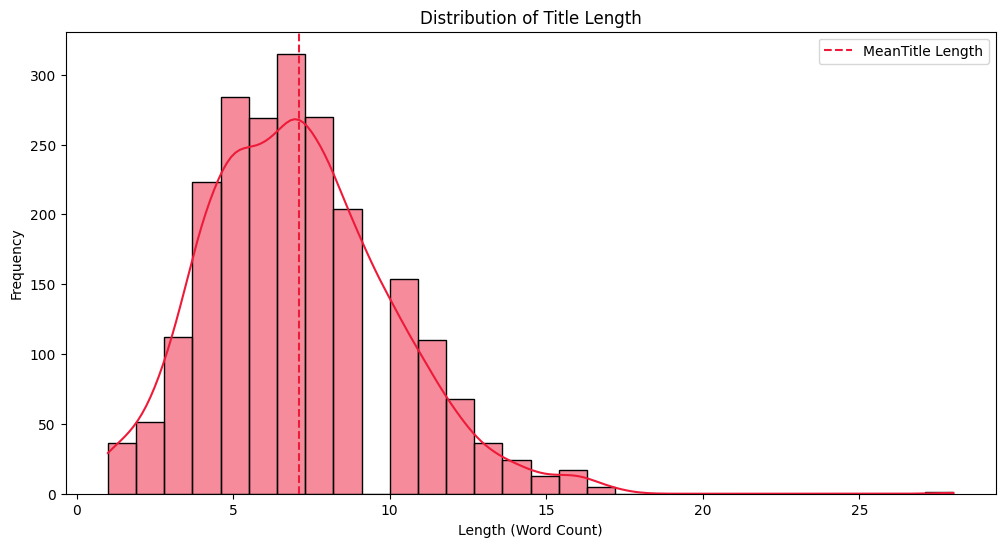

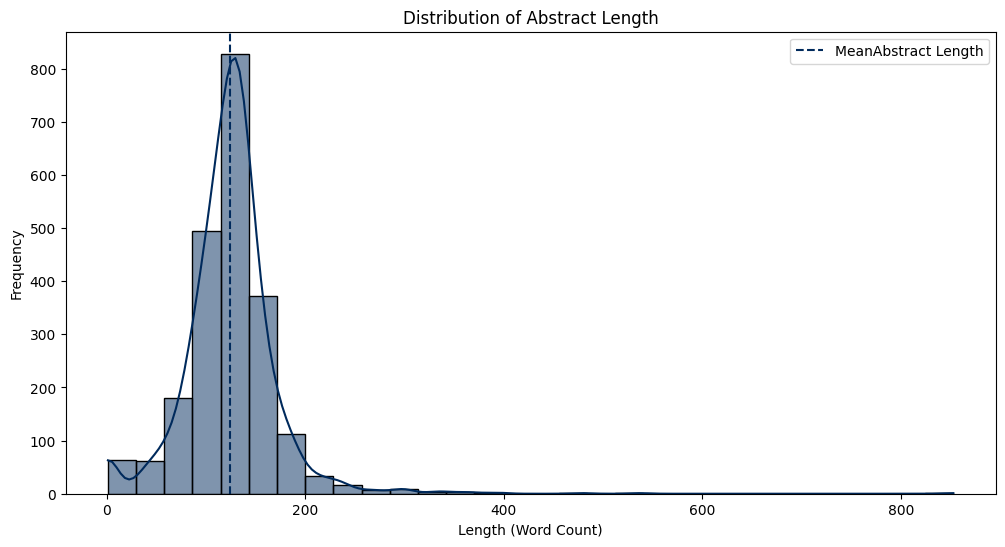

In [23]:
print(f"Interventions title & abstract distribution")
show_distributions(stats_Int,'Title Length',col='#EE1A39')
show_distributions(stats_Int,'Abstract Length',col='#002A5C')

# 3. Data Preprocessing for embeddings

In [ ]:
#1. Filter out not classified data
